C:\Users\user\Documents\10acadamy\week_two\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


First 5 rows of the dataset:
        user_id  num_sessions  total_duration  total_download  total_upload  \
0  3.360100e+10             1        116720.0    8.426375e+08    36053108.0   
1  3.360100e+10             1        181230.0    1.207552e+08    36104459.0   
2  3.360100e+10             1        134969.0    5.566597e+08    39306820.0   
3  3.360101e+10             1         49878.0    4.019932e+08    20327526.0   
4  3.360101e+10             2         37104.0    1.363130e+09    94280527.0   

   social_media_data  google_data  email_data  youtube_data  netflix_data  \
0          2206504.0    3337123.0    837400.0    14900201.0    10265105.0   
1          2598548.0    4197697.0   2828821.0     5324251.0      770569.0   
2          3148004.0    3343483.0   2436500.0     2137272.0    16525919.0   
3           251469.0    5937765.0   2178618.0     4393123.0     1157362.0   
4          2861230.0   13728668.0   2247808.0    10339971.0    24971647.0   

    gaming_data   other_data  
0 

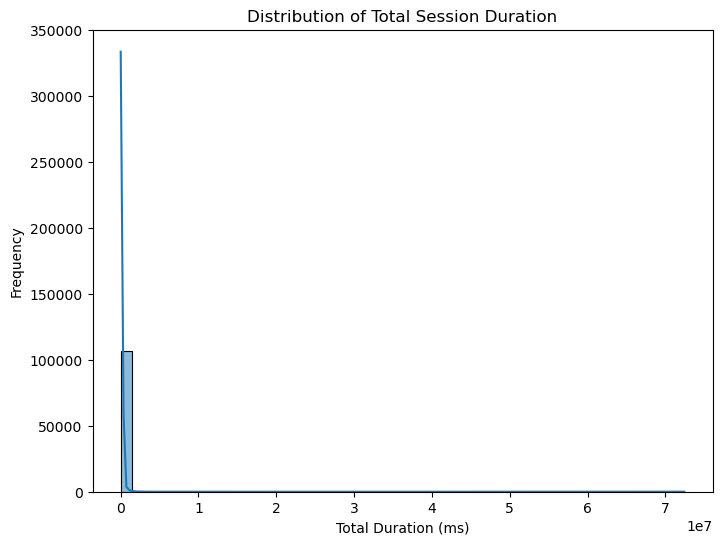

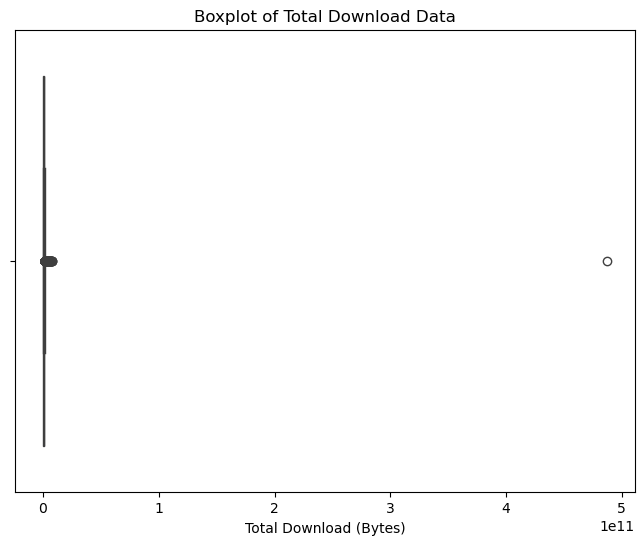

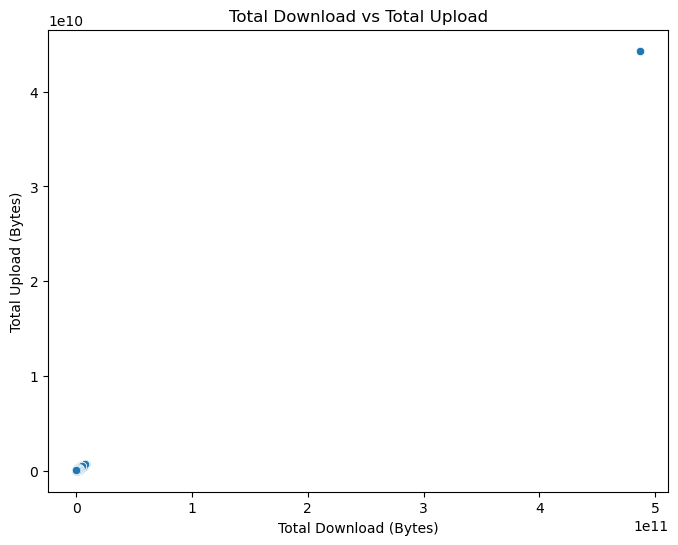

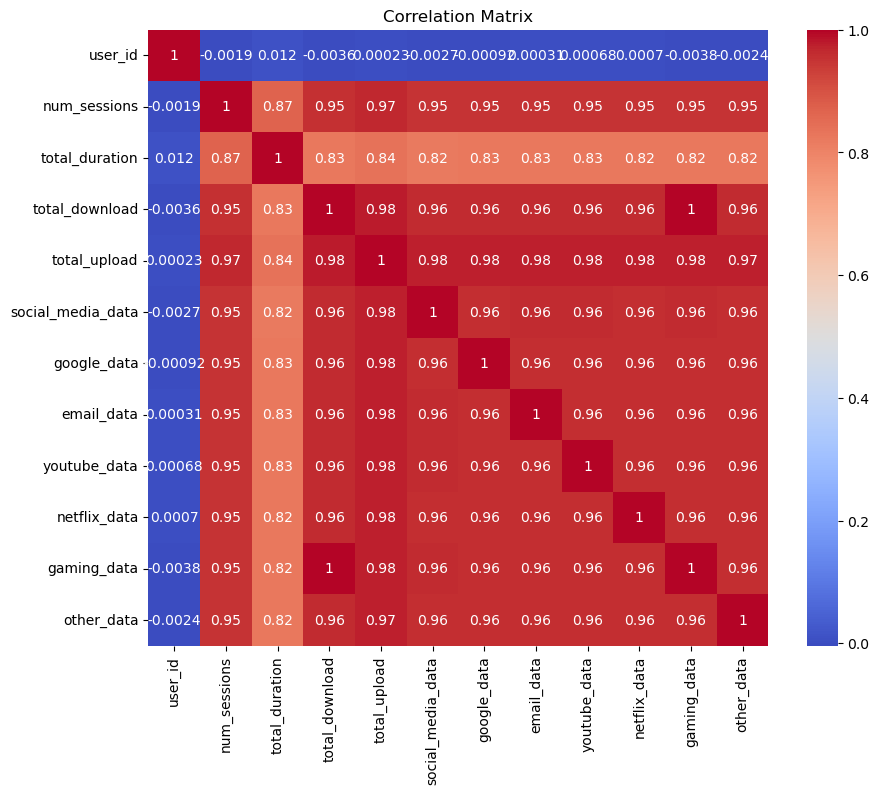


Total Data (Download & Upload) per Decile:
                 total_download  total_upload
duration_decile                              
0                  1.059394e+13  9.547430e+11
1                  1.152621e+13  1.044428e+12
2                  1.060947e+13  9.605178e+11
3                  1.281675e+13  1.157958e+12
4                  2.265014e+13  2.050534e+12


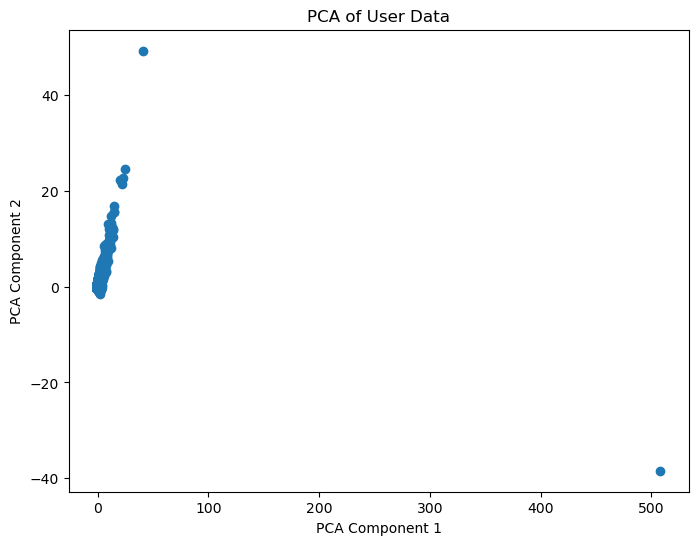


Explained Variance Ratio of PCA Components:
[0.9207437  0.07204722]


In [1]:
# notebooks/user_analysis.ipynb

# Import necessary libraries
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Add the 'src' folder to the Python path
sys.path.append(os.path.abspath('../src'))

# Import functions to get data
from user_analysis import aggregate_user_data

# Step 1: Load the Data
df_user_aggregates = aggregate_user_data()

# Check the first few rows
print("First 5 rows of the dataset:")
print(df_user_aggregates.head())

# Step 2: Data Overview

# Check basic info about the dataset
print("\nDataset Information:")
df_user_aggregates.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df_user_aggregates.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df_user_aggregates.isnull().sum())

# Step 3: Univariate Analysis

# Non-Graphical Analysis
print("\nSummary Statistics for Key Metrics:")
print(df_user_aggregates[['total_duration', 'total_download', 'total_upload']].describe())

# Graphical Analysis

# Distribution of session duration
plt.figure(figsize=(8, 6))
sns.histplot(df_user_aggregates['total_duration'], bins=50, kde=True)
plt.title('Distribution of Total Session Duration')
plt.xlabel('Total Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Boxplot of total download data
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_user_aggregates['total_download'])
plt.title('Boxplot of Total Download Data')
plt.xlabel('Total Download (Bytes)')
plt.show()

# Step 4: Bivariate Analysis

# Scatterplot between total download and total upload
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_download', y='total_upload', data=df_user_aggregates)
plt.title('Total Download vs Total Upload')
plt.xlabel('Total Download (Bytes)')
plt.ylabel('Total Upload (Bytes)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_user_aggregates.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Step 5: Segmentation

# Create decile-based segmentation for total session duration
df_user_aggregates['duration_decile'] = pd.qcut(df_user_aggregates['total_duration'], 5, labels=False)

# Group by decile and calculate total data (download & upload) per decile
decile_data = df_user_aggregates.groupby('duration_decile')[['total_download', 'total_upload']].sum()

print("\nTotal Data (Download & Upload) per Decile:")
print(decile_data)

# Step 6: PCA (Principal Component Analysis)

# Select numerical features for PCA
features = ['total_duration', 'total_download', 'total_upload']
x = df_user_aggregates[features]

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(x_scaled)

# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA of User Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

print("\nExplained Variance Ratio of PCA Components:")
print(pca.explained_variance_ratio_)


Text(0.5, 1.0, 'PCA of User Data')

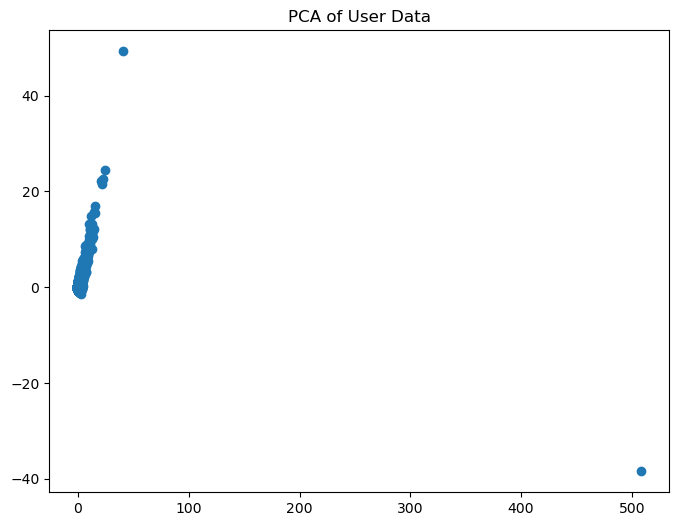

In [2]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.title('PCA of User Data')

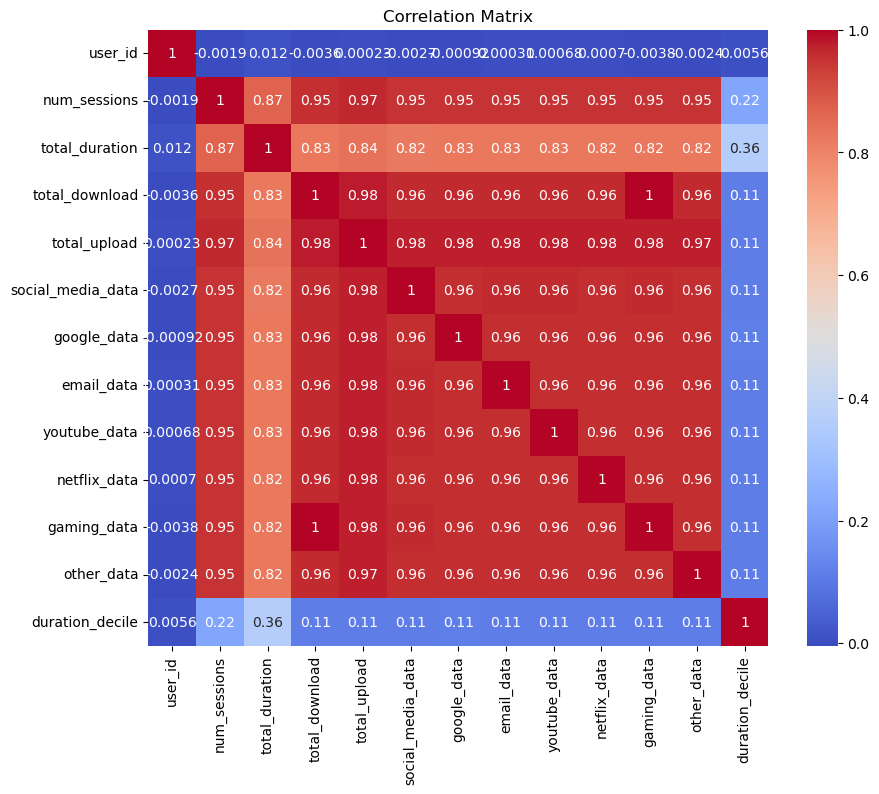

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_user_aggregates.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()